In [10]:
%matplotlib notebook
from plotter import *

data = pickle.load(open('../../../Xharecost_MS_annex/plot_data.pkl','rb'))


<IPython.core.display.Javascript object>


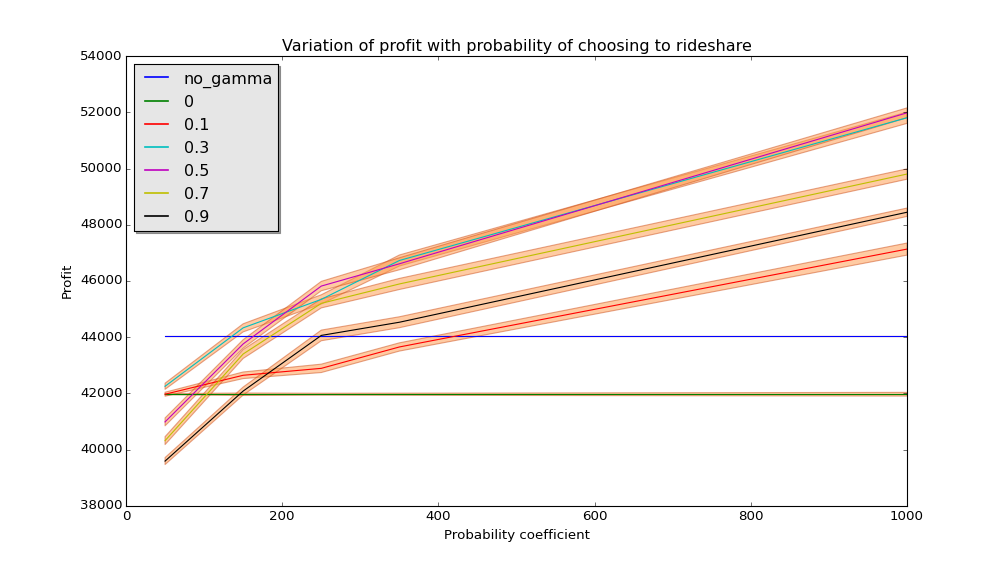

In [11]:
#Function of coeff
plot_result_probability(data)

<IPython.core.display.Javascript object>


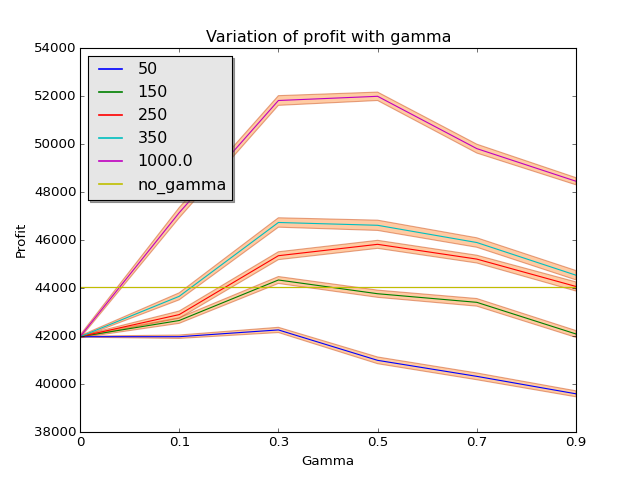

In [12]:
#Function of gamma
plot_result_gamma(data)

In [ ]:
#Single coeff val plot
coeff_indices = [x for x in data['profits_given_coeffs']]
data_matrix = data['profits_given_coeffs'][coeff_indices[0]]['total_profit_array'].transpose()
GAMMA_ARRAY_ALL = data['instance_base']['instance_params']['GAMMA_ARRAY_ALL']
plot_result_single(data_matrix,GAMMA_ARRAY_ALL)